##**A Brief Look at Driving Distance and Putting on the PGA Tour in 2002 and 2017**

###**Driving**  
The PGA Tour has seen a huge increase in the distance players can drive the ball over the last few decades.  This has been down to technological advances in equipment allied to players focusing more on strength, fitness and flexibility.  I'll highlight this advancement using the PGA Tour **Driving Distance** statistic, described on the PGA Tour website as:
> The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not.

###**Putting**
This led me to wonder if there had been a corresponding improvement in players putting ability over the same time frame.  The statistic I've chosen to use in this comparison is the PGA Tour **Putting From 10 Feet** statistic, described on the PGA Tour website as:  
> For all holes where putting distance was determined with a laser, the percent of putts made when the ball is greater than 9 feet and less than or equal to 10 feet from the hole. In order to be ranked, a minimum of ten attempts must be made.

I've chosen the starting point of the analysis as 2002 as that is the first season the relevant putting stats were collected.


###**Methodology**
I'll begin by writing a function to turn the table contents of a PGATour.com stats page into a DataFrame using the URL of the page.  I'll use the function to collect the relevant data for each year, then I'll merge and clean up the DataFrames appropriately.

In [1]:
#Import required modules
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

In [2]:
#Create the function to acquire the PGA Tour data
def pga_url_to_df(url):
    """Turn a pga stats page url into a DataFrame"""
    #Package the request, send request, catch response: r
    r = requests.get(url)
    #Extract the response as HTML: html_doc
    html_doc = r.text
    #Create our Beautiful Soup object from the HTML: main_soup
    main_soup = soup(html_doc, 'lxml')
    #Find our table in the soup    
    stat_table = main_soup.find('table', {'id':'statsTable'})
    #Find elements in the 'body' of the table
    stat_table_body = stat_table.find('tbody')
    
    #Initialize an empty array
    stat_data = []
    
    #Filter for the rows in the table body
    rows = stat_table_body('tr')
    for player in rows:
        #select all cells in the row
        cols = player.find_all('td')
        #Strip out empty values
        cols = [ele.text.strip() for ele in cols]
        #Append data to our array
        stat_data.append([ele for ele in cols if ele])
        
    #Sort the table header, using same process as above for the table body
    stat_table_header = stat_table.find('thead')
    stat_header = []
    hrows = stat_table_header('tr')
    for header in hrows:
        cols = header.find_all('th')
        cols = [ele.text.strip() for ele in cols]
        #Append data to our array
        stat_header.append([ele for ele in cols if ele])

    #Create our header array
    stat_col_labels = stat_header[0]
    
    #Return a DataFrame of the data
    return pd.DataFrame(stat_data, columns=stat_col_labels)

In [3]:
#Use function to get 2002 PGA putting data and driving data
putt_02_df = pga_url_to_df(url = 'https://www.pgatour.com/stats/stat.348.2002.html')
print(putt_02_df.head())

drive_02_df = pga_url_to_df(url = 'https://www.pgatour.com/stats/stat.101.2002.html')
print(drive_02_df.head())

  RANK THIS WEEK RANK LAST WEEK      PLAYER NAME ROUNDS % MADE ATTEMPTS  \
0             T1             T1      Kenny Perry     98  72.73       22   
1             T1             T1  Paul Stankowski    100  72.73       11   
2              3              3      David Frost     90  71.43       21   
3              4              4     Joel Edwards    101  70.59       17   
4             T5             T5    Brian Bateman     94  68.00       25   

  PUTTS MADE  
0         16  
1          8  
2         15  
3         12  
4         17  
  RANK THIS WEEK RANK LAST WEEK         PLAYER NAME ROUNDS   AVG.  \
0              1              1           John Daly     62  306.8   
1              2              2         Boo Weekley     57  297.0   
2              3              3       Mathew Goggin     64  296.1   
3             T4             T4  Charles Howell III    118  293.7   
4             T4             T4      Dennis Paulson     89  293.7   

  TOTAL DISTANCE TOTAL DRIVES  
0         35

In [4]:
#Use function to get 2017 PGA putting data and driving data
putt_17_df = pga_url_to_df(url = 'https://www.pgatour.com/stats/stat.348.2017.html')
print(putt_17_df.head())

drive_17_df = pga_url_to_df(url = 'https://www.pgatour.com/stats/stat.101.2017.html')
print(drive_17_df.head())

  RANK THIS WEEK RANK LAST WEEK         PLAYER NAME ROUNDS % MADE ATTEMPTS  \
0              1              1  Rafa Cabrera Bello     63  66.67       27   
1              2              2   Xander Schauffele     96  60.00       30   
2              3              3      Dustin Johnson     77  59.52       42   
3              4              4         Luke Donald     50  58.33       24   
4              5              5        Cody Gribble     79  58.00       50   

  PUTTS MADE  
0         18  
1         18  
2         25  
3         14  
4         29  
  RANK THIS WEEK RANK LAST WEEK     PLAYER NAME ROUNDS   AVG. TOTAL DISTANCE  \
0              1              1    Rory McIlroy     51  316.7         26,600   
1              2              2  Dustin Johnson     77  314.4         40,241   
2              3              3    Brandon Hagy     85  312.7         48,162   
3              4              4       Luke List    102  311.5         61,046   
4              5              5    Andrew

In [5]:
#Merge the dataframes of putting and driving for each year together
"""Now we need to merge (using pd.merge()) our two DataFrames for 2002 on the PLAYER NAME column, which is common to both DFs.  
Set the on= parameter to PLAYER NAME as our column to merge on""" 

golf_data_02 = pd.merge(putt_02_df, drive_02_df, on='PLAYER NAME')
print(golf_data_02.head())
print(golf_data_02.shape)

#Select only required columns
golf_data_02 = golf_data_02.loc[:, ('PLAYER NAME', '% MADE', 'ATTEMPTS', 'AVG.')]
print(golf_data_02.head())
print(golf_data_02.info())

  RANK THIS WEEK_x RANK LAST WEEK_x      PLAYER NAME ROUNDS_x % MADE ATTEMPTS  \
0               T1               T1      Kenny Perry       98  72.73       22   
1               T1               T1  Paul Stankowski      100  72.73       11   
2                3                3      David Frost       90  71.43       21   
3                4                4     Joel Edwards      101  70.59       17   
4               T5               T5    Brian Bateman       94  68.00       25   

  PUTTS MADE RANK THIS WEEK_y RANK LAST WEEK_y ROUNDS_y   AVG. TOTAL DISTANCE  \
0         16               37               37       98  286.4         53,839   
1          8               34               34      100  287.0         55,671   
2         15              187              187       90  269.5         47,969   
3         12              125              125      101  277.6         56,074   
4         17              T26              T26       94  288.6         51,363   

  TOTAL DRIVES  
0        

In [6]:
#Deal with column data types and any missing values
"""We can see from our .info call that all the cols are object type, this should be looked at as clearly there are a number of 
cols that should be int or float type."""
golf_data_02['% MADE'] = pd.to_numeric(golf_data_02['% MADE'], errors='coerce')
golf_data_02['ATTEMPTS'] = pd.to_numeric(golf_data_02['ATTEMPTS'], errors='coerce')
golf_data_02['AVG.'] = pd.to_numeric(golf_data_02['AVG.'], errors='coerce')

print(golf_data_02.head())
print(golf_data_02.info())

       PLAYER NAME  % MADE  ATTEMPTS   AVG.
0      Kenny Perry   72.73        22  286.4
1  Paul Stankowski   72.73        11  287.0
2      David Frost   71.43        21  269.5
3     Joel Edwards   70.59        17  277.6
4    Brian Bateman   68.00        25  288.6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 4 columns):
PLAYER NAME    188 non-null object
% MADE         188 non-null float64
ATTEMPTS       188 non-null int64
AVG.           188 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.3+ KB
None


In [7]:
#Repeat the merging and cleaning process for the 2017 data
golf_data_17 = pd.merge(putt_17_df, drive_17_df, on='PLAYER NAME')

#Select only required columns
golf_data_17 = golf_data_17.loc[:, ('PLAYER NAME', '% MADE', 'ATTEMPTS', 'AVG.')]
print(golf_data_17.head())
print(golf_data_17.info())

          PLAYER NAME % MADE ATTEMPTS   AVG.
0  Rafa Cabrera Bello  66.67       27  291.0
1   Xander Schauffele  60.00       30  306.3
2      Dustin Johnson  59.52       42  314.4
3         Luke Donald  58.33       24  278.5
4        Cody Gribble  58.00       50  297.2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 4 columns):
PLAYER NAME    190 non-null object
% MADE         190 non-null object
ATTEMPTS       190 non-null object
AVG.           190 non-null object
dtypes: object(4)
memory usage: 7.4+ KB
None


In [8]:
#Deal with column data types and any missing values
golf_data_17['% MADE'] = pd.to_numeric(golf_data_17['% MADE'], errors='coerce')
golf_data_17['ATTEMPTS'] = pd.to_numeric(golf_data_17['ATTEMPTS'], errors='coerce')
golf_data_17['AVG.'] = pd.to_numeric(golf_data_17['AVG.'], errors='coerce')

print(golf_data_17.head())
print(golf_data_17.info())

          PLAYER NAME  % MADE  ATTEMPTS   AVG.
0  Rafa Cabrera Bello   66.67        27  291.0
1   Xander Schauffele   60.00        30  306.3
2      Dustin Johnson   59.52        42  314.4
3         Luke Donald   58.33        24  278.5
4        Cody Gribble   58.00        50  297.2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 4 columns):
PLAYER NAME    190 non-null object
% MADE         190 non-null float64
ATTEMPTS       190 non-null int64
AVG.           190 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.4+ KB
None


##**Analysis**
###**Initial EDA**
Lets take a quick look at some descriptive stats from our DataFrames.

In [9]:
#Basic EDA
print(golf_data_02.describe())
print(golf_data_17.describe())

           % MADE    ATTEMPTS        AVG.
count  188.000000  188.000000  188.000000
mean    44.471223   18.946809  279.631915
std     11.680100    5.607228    7.279555
min     10.000000   10.000000  256.600000
25%     35.927500   15.000000  274.775000
50%     44.830000   19.000000  279.950000
75%     52.380000   22.000000  284.550000
max     72.730000   34.000000  297.000000
           % MADE    ATTEMPTS        AVG.
count  190.000000  190.000000  190.000000
mean    41.775632   43.847368  292.570000
std      7.994311   11.767720    9.366421
min     21.950000   17.000000  270.100000
25%     37.500000   36.000000  286.500000
50%     41.240000   44.000000  292.500000
75%     46.630000   52.750000  298.475000
max     66.670000   70.000000  316.700000


**Driving** - Note the mean average driving distance (AVG.) was 279.63 yards in 2002, but increases to 292.57 in 2017.

**Putting** - The mean percentage of putts made from 10 feet was 44.47% in 2002, but *falls* to 41.24% in 2017.  This is odd, we should definitely look into this further.

###**ECDF's**

Lets look at the empirical cumulative distribution functions for both driving and putting in the 2 years.  To do this I'll use a function to help compute the ECDF.

In [10]:
#Import required modules
import numpy as np

#Define our ECDF function
def ecdf(data):
    """Compute ECDF for a 1D array of measurements"""
    #Compute number of data points:n
    n = len(data)
    #x-data for the ECDF:x
    x = np.sort(data)
    #y-data for the ECDF:y
    y = np.arange(1, n+1)/n
    return x, y

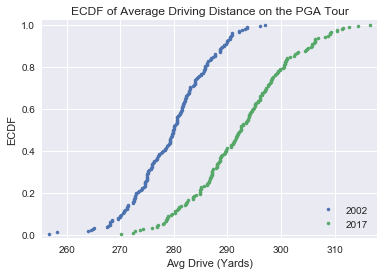

In [11]:
#Use function for driving stat
x_drive_02, y_drive_02 = ecdf(golf_data_02['AVG.'])
x_drive_17, y_drive_17 = ecdf(golf_data_17['AVG.'])

#Plot the ECDF's
import matplotlib.pyplot as plt
import seaborn as sns    

#Set Seaborn as default
sns.set()

#Generate plot
_ = plt.plot(x_drive_02, y_drive_02, marker = '.', linestyle = 'none')
_ = plt.plot(x_drive_17, y_drive_17, marker = '.', linestyle = 'none')

#Add a margin to the plot
plt.margins(0.02)

#Add labels
_ = plt.xlabel('Avg Drive (Yards)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Average Driving Distance on the PGA Tour')
_ = plt.legend(('2002', '2017'), loc='lower right')

#Display the plot
plt.show()

The ECDF for driving makes it very clear, there has been a large tour-wide improvement in driving distance between 2002 and 2017, as we expected.

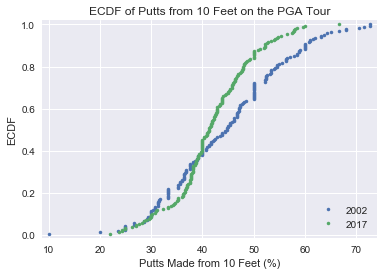

In [12]:
#Use function for putting stat
x_putt_02, y_putt_02 = ecdf(golf_data_02['% MADE'])
x_putt_17, y_putt_17 = ecdf(golf_data_17['% MADE'])

#Plot the ECDF's
_ = plt.plot(x_putt_02, y_putt_02, marker = '.', linestyle = 'none')
_ = plt.plot(x_putt_17, y_putt_17, marker = '.', linestyle = 'none')

#Add a margin to the plot
plt.margins(0.02)

#Add labels
_ = plt.xlabel('Putts Made from 10 Feet (%)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Putts from 10 Feet on the PGA Tour')
_ = plt.legend(('2002', '2017'), loc='lower right')

#Display the plot
plt.show()

The ECDF for putting is far less clear.  The variance in the 2002 data is larger, as is the mean.  Lets take a closer look at putting.

###**Parameter Estimates**
Here I'll estimate the difference of the mean putts made % of the samples from 2002 and 2017.  I'll then report a 95% confidence interval of this difference of means.  I'll be using hacker statistics for this part of the analysis, defining some functions to help with the task. 

In [13]:
#Bootstrap replicate function - to create 1 replicate
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#Write a new function that uses bootstrap_replicate_1d() to create many bootstrap replicates, draw_bs_reps()
    
#Create many bootstrap replicates: draw_bs_reps()
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [14]:
#Compute the difference of the sample means:mean_diff
mean_diff = np.mean(golf_data_17['% MADE']) - np.mean(golf_data_02['% MADE'])

#Get bootstrap replicates of means
bs_replicates_02 = draw_bs_reps(golf_data_02['% MADE'], np.mean, 10000)
bs_replicates_17 = draw_bs_reps(golf_data_17['% MADE'], np.mean, 10000)

#Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_17 - bs_replicates_02

#Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

#Print results
print('difference of means =', mean_diff, '%')
print('95% confidence interval =', conf_int, '%')

difference of means = -2.6955918253079574 %
95% confidence interval = [-4.69856449 -0.72418063] %


This difference of means and 95% C.I. suggests that putting ability might have gotten worse since 2002!  Is this effect down to random chance?  ie, what is the probability that we would get the observed difference in mean putts made % if the means were the same?
Lets check this using a hypothesis test.

###**Hypothesis Test**
**Null hypothesis** - Players in 2017 are as good at putting as those in 2002.
ie, the mean % of putts made from 10 feet for both groups are equal.

**Alternative hypothesis** - that players in 2017 are not as good at putting as 
those in 2002, ie, the mean % of putts made from 10 feet from the 2017 players 
is lower than that of the 2002 players.

In [15]:
#Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((golf_data_02['% MADE'], golf_data_17['% MADE'])))

#Shift the samples
putt_02_shifted = golf_data_02['% MADE'] - np.mean(golf_data_02['% MADE']) + combined_mean
putt_17_shifted = golf_data_17['% MADE'] - np.mean(golf_data_17['% MADE']) + combined_mean

#Get bootstrap replicates of the shifted data sets
bs_replicates_putt_02 = draw_bs_reps(putt_02_shifted, np.mean, 10000)
bs_replicates_putt_17 = draw_bs_reps(putt_17_shifted, np.mean, 10000)

#Compute replicates of difference of means: bs_diff_replicates_putt
bs_diff_replicates_putt = bs_replicates_putt_17 - bs_replicates_putt_02

#Compute and print the p-value
p = np.sum(bs_diff_replicates_putt <= mean_diff) / len(bs_diff_replicates_putt)
print('p =', p)

p = 0.0042


###**Conclusion**
A p-value of **0.0042** suggests there **is** a statistically significant difference.  I'm inclined to reject the null hypothesis and accept the alternative hypothesis, players in 2017 are not as good at putting as those in 2002.

###**Further thoughts**
There's no doubt todays players drive the ball further than their 2002 cohort, so why has one area of the game improved so markedly yet another equally important area of the game, putting, seemingly haven gotten worse?  Are todays players *actually* worse at putting or are there other reasons that explain the difference?  If so what are those differences?

**Potential Explanations**
- Are pin positions put in more tricky places on greens nowadays compared to 2002?  It would be understandable if the PGA Tour tried to offset for players hitting the ball further by making putting *intentionally harder* in an effort to maintain the overall difficulty level of a golf course.
- Are todays players simply focusing so much on hitting the ball further that they are spending less time on improving their putting?  If you're in the gym pumping iron you cant be practicing your putting at the same time!
- On a related theme, is there a biomechanical aspect? Are the bigger muscles in the arms of modern players that help their driving a detriment to accurate putting, an area of the game that relies far more on feel and touch?
- Equipment.  Are club manufacturers (inadvertently) using inferior materials/designs in the production of modern putters compared to 2002?  This seems highly unlikely.  Its more likely that the putter is a fairly basic club compared to a driver, with limited opportunity for a club manufacturer to make a real breakthrough in performance through a redesign.

If there is one takeaway for the average amateur golfer from this analysis its this, if your going to spend a lot of money on one golf club, make it a driver, not a putter.  There's no evidence here that putters have improved since 2002.

##**Further Analysis**
How could this analysis be expanded to make its conclusion more robust (or debunked)?  Well i've only taken a snapshot from two years, what if either 2002 or 2017 were outliers to the general putting trend?  Repeating the analysis with data from 2003 and 2016 could prove enlightening here.